# 空气质量pred
http://www.scdata.net.cn/common/cmpt/%E7%A9%BA%E6%B0%94%E8%B4%A8%E9%87%8F%E9%A2%84%E6%B5%8B_%E8%B5%9B%E9%A2%98%E4%B8%8E%E6%95%B0%E6%8D%AE.html

## 竞赛背景


        成都，是公园城市的“首提地”，2018年2月，习总书记明确提出“突出公园城市特点，把生态价值考虑进去”。近年来，成都市全年天气质量状况不断好转，大气污染治理取得了长足的进步，积累了宝贵的经验，但是，大气污染紧张、情况恶化还没有彻底消弭。当前，随着信息技术的不断发展，我们累计了大量悠久的空气质量原始数据，将利用大数据、人工智能等高科技技术手段，对成都市空气质量进行实时监测及预警，做到“未病先知，未病先治”，进一步改善我市环境空气质量，形成人与自然和谐发展新格局，让绿色发展成为城市最鲜美底色和最持久优势。

        本赛题以空气质量预测为任务，实现分区域空气质量预报能力，全面掌握空气污染分布特点，挖掘排放源和污染物的分布关联关系。以数据创新应用为方向，为空气污染联防联控提供辅助决策。
## 任务

    利用空气质量监测和气象监测历史数据，预测未来7日各区域的空气质量（AQI）情况。
    
## 数据
*注 : 报名参赛或加入队伍后，可获取数据下载权限。

大赛可用数据包括大赛组委会提供的数据以及各网站的公开气象数据。

数据包含8个空气质量监测站的监测记录信息。

初赛：提供2017年全年数据。（部分站点的数据有缺失）

    数据划分为训练集和测试集。

    测试集数据包含时间段2017年5月25日~2017年5月31日；2017年12月25日~2017年12月31日，详见to_predict.csv

    注1：部分监测站仅需预测  2017年12月25日~2017年12月31日  之间的数据。

    注2：UPDATE_TIME为数据记录的时间，在to_predict.csv中，此记录只保留到了“小时”这个维度，分钟用xx代替。

    注3：在数据中会存在数据记录缺失的现象，导致没有正确答案；这些记录将不被计算入分数。 


复赛：增加数据（待更新）

决赛：增加数据（待更新）
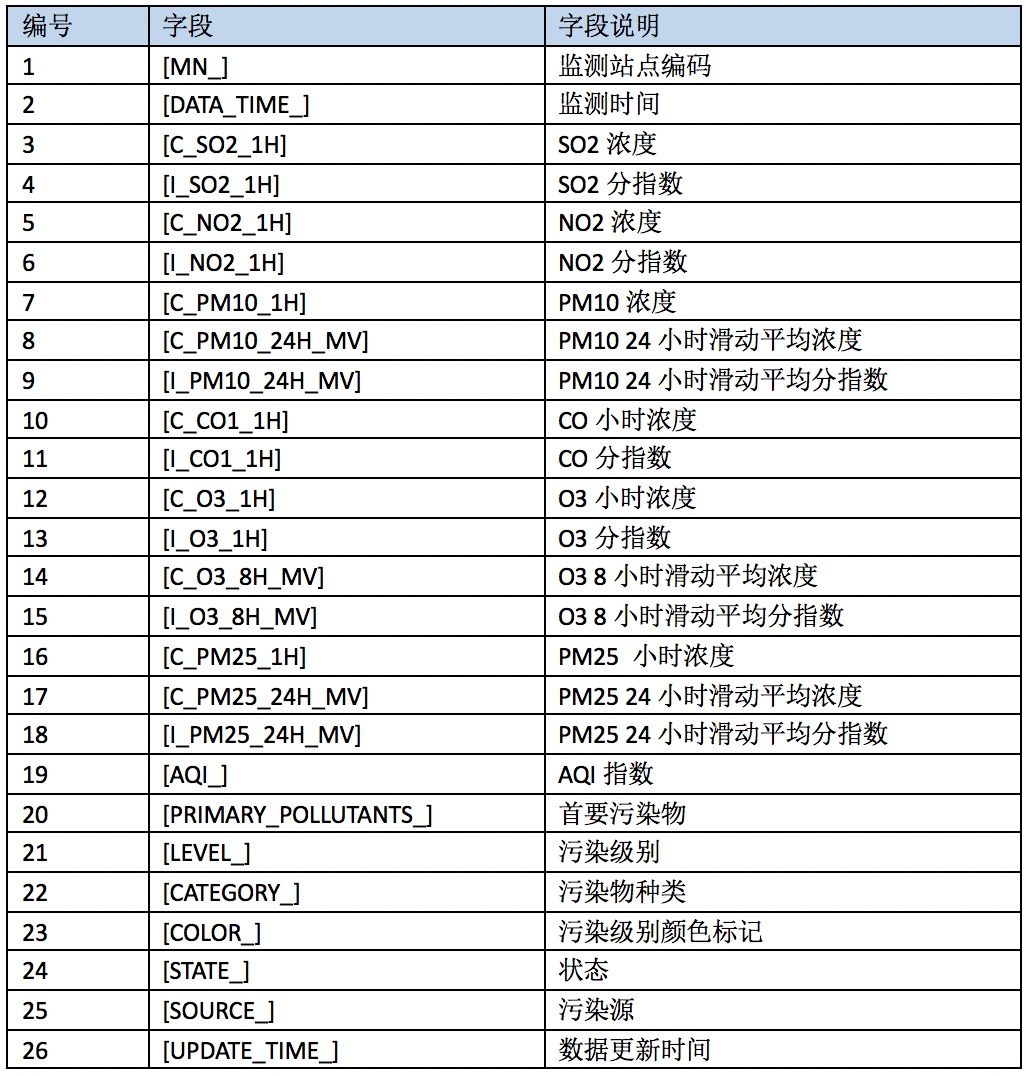

## 评分标准

评分指标采用标准的RMSE。比赛采用A/B榜（提取码：bd6m），A:B=5:5。

在数据中会存在数据记录缺失的现象，导致没有正确答案；这些记录将不被计算入分数。

参考代码如下：



In [3]:
import numpy as np
y_pred = np.array([1,2,3,4])
y_true = np.array([5,6,7,8])
score = np.sqrt(((y_pred - y_true) ** 2).mean()) 

# lib导入

In [1]:
# export
import os
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [2]:
import sys
sys.path.append('..')
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.utils.pickle import PickleWrapper
from mylib.data.processing.eda import describe

# load data

In [3]:
args.DATA_DIR

'../../data/contest/20sichuan_air_quality_pred/'

In [4]:
!ls ../../data/contest/20sichuan_air_quality_pred/

to_predict       train            站点信息.csv


In [5]:
!tree ../../data/contest/20sichuan_air_quality_pred/

../../data/contest/20sichuan_air_quality_pred/
├── to_predict
│   ├── submit_example.csv
│   └── to_predict.csv
├── train
│   ├── train_�\211�\223��\221.csv
│   ├── train_�\215\201�\207\214�\227.csv
│   ├── train_�\220\233平�\227.csv
│   ├── train_大�\237�西路.csv
│   ├── train_�\231河�\223�.csv
│   ├── train_�\201�岩寺.csv
│   ├── train_�\207\221�\211两河.csv
│   └── train_�\231�\211驿�\214��\224��\234.csv
└── �\231�\202�信�\201�.csv

2 directories, 11 files
